In [1]:
import networkx as nx
import  pickle
import pandas as pd
import numpy as np
import glob
import os
import re
from collections import Counter
import pylab as plt

In [2]:
data=pd.read_csv("./low_mem_data.csv")

D:\sw\anaconda\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
test1=data.dropna(how="all", axis=0)
data['SRC'].replace('', np.nan, inplace=True)
data.dropna(subset=['SRC'], inplace=True)
data['NUM_WORDS'].replace('', np.nan, inplace=True)
data.dropna(subset=['NUM_WORDS'], inplace=True)
data['NUM_WORDS'].replace(' ', np.nan, inplace=True)
data.dropna(subset=['NUM_WORDS'], inplace=True)

In [4]:
countWords=Counter(data["NUM_WORDS"])
def PWords(W=''):
    global countWords # the global keyword tells this function to use the global variable called counts
    global data  
    return float(countWords[W]) / float(len(data))

In [5]:
sum([PWords(W=x) for  x in set(data["NUM_WORDS"])])

1.0000000000000018

In [9]:
def plotHist(tab, indicator):
    tmp=[]
    for a in tab[indicator]:
        dt = a
        if type(a) == str:
            dt = int(a)
        tmp.append(a)
    plt.hist(tmp,bins=100)

In [10]:
data

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
0,Steel1943,BDD,1,1,'''Support''' as co-nom.,"23:13, 19 April 2013",2013,7923,5957,0,4,137,5,3
1,Cuchullain,BDD,1,1,'''Support''' as nominator.--,"01:04, 20 April 2013",2013,3442,5957,63,2,137,5,3
2,INeverCry,BDD,1,1,'''Support''' per noms.,"23:43, 19 April 2013",2013,8299,5957,110,23,137,5,3
3,Cncmaster,BDD,1,1,'''Support''' per noms. BDD is a strong contri...,"00:11, 20 April 2013",2013,11082,5957,0,21,137,5,21
4,Miniapolis,BDD,1,1,"'''Support''', with great pleasure. I work wit...","00:56, 20 April 2013",2013,8311,5957,115,43,137,5,35
5,Sven Manguard,BDD,1,1,'''Support''' There are plenty of important ro...,"01:53, 20 April 2013",2013,7383,5957,32,97,137,5,41
6,Ramaksoud2000,BDD,1,1,'''Support''' per noms. I don't see a reason n...,"02:00, 20 April 2013",2013,6167,5957,0,6,137,5,10
7,RockMagnetist,BDD,1,1,'''Support''' BDD already wields a broom pret...,"02:18, 20 April 2013",2013,5622,5957,102,5,137,5,109
8,Carrite,BDD,1,1,'''Support''' barring a completely unexpected ...,"02:22, 20 April 2013",2013,9758,5957,147,95,137,5,109
9,Someguy1221,BDD,1,1,'''Support''' because I see no good reason not...,"03:09, 20 April 2013",2013,5750,5957,71,57,137,5,9


In [11]:
len(data)

196614

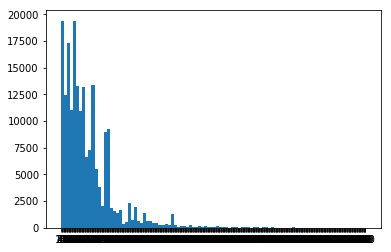

In [19]:
plotHist(data,"NUM_WORDS")

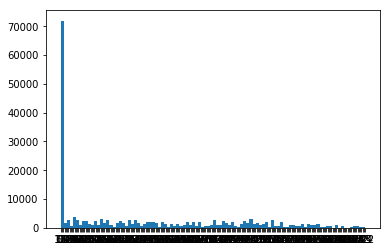

In [14]:
plotHist(data,"SRC_IN_DEGREE")

In [18]:
data['SRC_IN_DEGREE']

0           0
1          63
2         110
3           0
4         115
5          32
6           0
7         102
8         147
9          71
10        180
11        166
12          0
13         76
14          0
15         53
16          0
17         92
18          0
19          0
20         40
21         78
22          0
23          0
24          0
25          0
26        161
27          0
28          0
29          0
         ... 
198244      3
198245      4
198246      0
198248      1
198249      2
198250      0
198251      7
198252      6
198253      9
198254      0
198255      0
198256      0
198257      0
198258      0
198259      0
198260      4
198261      0
198262      0
198263      0
198264      0
198265      7
198266      1
198267      0
198268      0
198269      1
198270      0
198271      0
198272      0
198273      9
198274      0
Name: SRC_IN_DEGREE, Length: 196614, dtype: object

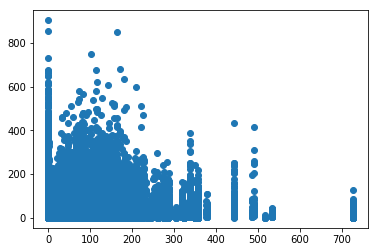

In [38]:
plt.scatter(data['SRC_IN_DEGREE'],data['NUM_WORDS'])

In [64]:
#data.ix['VOT', 1]
v1=data[data['VOT'] == 1]
v0=data[data['VOT'] == 0]
print(len(v1))
print(len(v0))

143055
11878


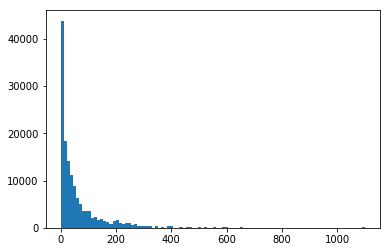

In [73]:
plotHist(v1,"TGT_OUT_DEGREE")

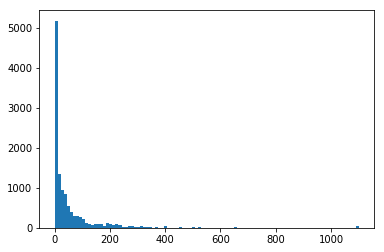

In [74]:
plotHist(v0,"TGT_OUT_DEGREE")

In [33]:
data

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
0,Steel1943,BDD,1,1,'''Support''' as co-nom.,"23:13, 19 April 2013",2013,7923,5957,0,4,137,5,3
1,Cuchullain,BDD,1,1,'''Support''' as nominator.--,"01:04, 20 April 2013",2013,3442,5957,63,2,137,5,3
2,INeverCry,BDD,1,1,'''Support''' per noms.,"23:43, 19 April 2013",2013,8299,5957,110,23,137,5,3
3,Cncmaster,BDD,1,1,'''Support''' per noms. BDD is a strong contri...,"00:11, 20 April 2013",2013,11082,5957,0,21,137,5,21
4,Miniapolis,BDD,1,1,"'''Support''', with great pleasure. I work wit...","00:56, 20 April 2013",2013,8311,5957,115,43,137,5,35
5,Sven Manguard,BDD,1,1,'''Support''' There are plenty of important ro...,"01:53, 20 April 2013",2013,7383,5957,32,97,137,5,41
6,Ramaksoud2000,BDD,1,1,'''Support''' per noms. I don't see a reason n...,"02:00, 20 April 2013",2013,6167,5957,0,6,137,5,10
7,RockMagnetist,BDD,1,1,'''Support''' BDD already wields a broom pret...,"02:18, 20 April 2013",2013,5622,5957,102,5,137,5,109
8,Carrite,BDD,1,1,'''Support''' barring a completely unexpected ...,"02:22, 20 April 2013",2013,9758,5957,147,95,137,5,109
9,Someguy1221,BDD,1,1,'''Support''' because I see no good reason not...,"03:09, 20 April 2013",2013,5750,5957,71,57,137,5,9


In [76]:
tgt=Counter(data['TGT'])

In [77]:
tgt

Counter({'BDD': 137,
         'Bilby': 137,
         'Darkwind': 146,
         'INeverCry': 110,
         'Jason Quinn': 195,
         'Legoktm': 155,
         'Lord Roem': 277,
         'Mattythewhite': 125,
         'Miniapolis': 115,
         'Mkdw': 107,
         'Nthep': 81,
         'Ocaasi': 171,
         'Paulmcdonald': 100,
         'RockMagnetist': 101,
         'Secret': 187,
         'Shirt58': 116,
         'Tokyogirl79': 148,
         'West.andrew.g': 121,
         'Ymblanter': 125,
         'angelo1345': 9,
         'AppleJack-7': 11,
         'Banaticus': 69,
         'Binksternet': 150,
         'Carrite': 146,
         'DCI2026': 19,
         'Dirtlawyer1': 140,
         'Hahc21': 56,
         'Jasper Deng': 67,
         'KumiokoCleanStart': 84,
         'Piotrus': 161,
         'Pjoef': 78,
         'Satellizer': 9,
         'Theopolisme': 190,
         'TortoiseWrath': 6,
         'Vacation9': 33,
         'Bagumba': 85,
         'Basalisk': 87,
         'Bbb23': 15

In [95]:
usr1=data[data['TGT'] == 'Secret']
usr1[usr1['VOT'] == -1]

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS
1924,Tariqabjotu,Secret,-1,1,"'''Oppose''', per [http://en.wikipedia.org/w/i...","06:28, 11 February 2013",2013,6023,3001,127,53,180,222,9
1925,Riffic,Secret,-1,1,"'''Oppose''', this user has demonstrated a pat...","06:39, 11 February 2013",2013,9018,3001,0,1,180,222,68
1926,Inks.LWC,Secret,-1,1,'''Oppose''' - It seems this user is far too i...,"06:49, 11 February 2013",2013,2493,3001,0,32,180,222,103
1927,Jusdafax,Secret,-1,1,'''Oppose''' - While I am sympathetic to the ...,"07:33, 11 February 2013",2013,9770,3001,0,173,180,222,37
1928,Ldvnsx,Secret,-1,1,'''Oppose''' this user has consistently failed...,"08:23, 11 February 2013",2013,7808,3001,0,1,180,222,28
1929,Bobrayner,Secret,-1,1,'''Weak oppose'''; past drama was not limited ...,"11:30, 11 February 2013",2013,8180,3001,0,69,180,222,153
1930,Tony1,Secret,-1,1,'''Oppose'''—Per several of the comments above.,"14:00, 11 February 2013",2013,1346,3001,70,53,180,222,6
1931,Kiefer.Wolfowitz,Secret,-1,1,'''Oppose'''. The good news is that the editor...,"22:15, 11 February 2013",2013,258,3001,0,116,180,222,58
1932,Sven Manguard,Secret,-1,1,'''Oppose''' I don't really care about the hea...,"01:55, 12 February 2013",2013,7383,3001,32,97,180,222,22
1933,GiantSnowman,Secret,-1,1,'''Oppose''' - not every good editor will make...,"09:08, 12 February 2013",2013,10102,3001,191,68,180,222,23


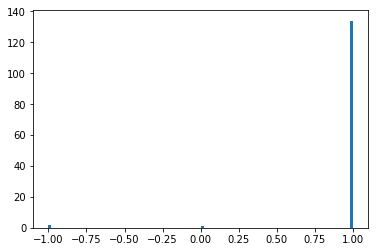